In [64]:
import pickle
import os
import matplotlib.pyplot as plt
import numpy as np

In [4]:
DATA_FOLDER = '../data'
DATA_FILE = 'restocracy_all_data.pkl'

In [5]:
with open(os.path.join(DATA_FOLDER, DATA_FILE), 'rb') as fh:
    data = pickle.load(fh)

In [11]:
data[0]

{'price': '202 lei',
 'review': ' \n Noul restaurant vedeta al Bucurestiului, o constructie geniala de marketing \n Maize s-a deschis la inceputul lui noiembrie 2017 in mansarda unui (fel de) bloc cu doua etaje de pe eleganta strada Paris, aproape de Piata Dorobantilor. Poti sa o iei, la fel de bine, si ca pe o casa veche din Bucurestiul vechi, facuta fara imaginatie, sau cu economie la arhitect. Casa e renovata recent, iar zona e atat de frumoasa si de aristocratica, incat orice casa de acolo nu poate sa fie decat frumoasa si ea, indiferent cum ar arata si in ce stare ar fi. \n Daca cei care au construit batrana casa nu au adus arhitecti cu imaginatie, cei care au transformat mansarda in restaurantul Maize au facut-o. Totul arata foarte bine acolo, au pus in valoare fiecare coltisor si detaliu, au reusit sa o umple si de lumina, si au facut loc si bucatariei chiar in mijloc, cu plite si gratare cu tot, dupa cum se vede si in poze, care ma scutesc de mai mult scris. Acolo, sus, au si o

In [7]:
len(data)

200

In [8]:
prices = [x['price'] for x in data]
reviews = [x['review'] for x in data]

In [10]:
prices[:5]

['202 lei', '176 lei', '187 lei', '264 lei', '187 lei']

In [14]:
reviews[0]

' \n Noul restaurant vedeta al Bucurestiului, o constructie geniala de marketing \n Maize s-a deschis la inceputul lui noiembrie 2017 in mansarda unui (fel de) bloc cu doua etaje de pe eleganta strada Paris, aproape de Piata Dorobantilor. Poti sa o iei, la fel de bine, si ca pe o casa veche din Bucurestiul vechi, facuta fara imaginatie, sau cu economie la arhitect. Casa e renovata recent, iar zona e atat de frumoasa si de aristocratica, incat orice casa de acolo nu poate sa fie decat frumoasa si ea, indiferent cum ar arata si in ce stare ar fi. \n Daca cei care au construit batrana casa nu au adus arhitecti cu imaginatie, cei care au transformat mansarda in restaurantul Maize au facut-o. Totul arata foarte bine acolo, au pus in valoare fiecare coltisor si detaliu, au reusit sa o umple si de lumina, si au facut loc si bucatariei chiar in mijloc, cu plite si gratare cu tot, dupa cum se vede si in poze, care ma scutesc de mai mult scris. Acolo, sus, au si o mica terasa pe acoperis, foarte

In [17]:
reviews[0].split()[:10]

['Noul',
 'restaurant',
 'vedeta',
 'al',
 'Bucurestiului,',
 'o',
 'constructie',
 'geniala',
 'de',
 'marketing']

In [42]:
def get_vocab(lst_docs):
    dct_occ = {}
    for doc in lst_docs:
        words = doc.split()
        for word in words:
            if word in dct_occ:
                dct_occ[word] += 1
            else:
                dct_occ[word] = 1
    occs = [(w, a) for w,a in dct_occ.items()]
    occs = sorted(occs, key=lambda x: x[1], reverse=True)
    dct_w2i = {w[0]:i+1 for i,w in enumerate(occs)}
    dct_w2i['UNK'] = 0
    dct_i2w = {i:w for w,i in dct_w2i.items()}
    return occs, dct_w2i, dct_i2w

In [43]:
oc, w2i, i2w = get_vocab(reviews)
oc[:10]

[('de', 7642),
 ('si', 6195),
 ('in', 3904),
 ('la', 3650),
 ('cu', 3275),
 ('mai', 3019),
 ('ca', 2698),
 ('sa', 2655),
 ('din', 2230),
 ('care', 2147)]

In [51]:
w2i['Noul']

2181

In [45]:
i2w[100]

'bune'

In [46]:
w2i.get('bunicel',0)

0

In [39]:
len(w2i)

21999

In [47]:
def doc_to_tokens(doc, dct_w2i, unk=0):
    tokens = []
    for word in doc.split():
        tokens.append(dct_w2i.get(word, unk))
    return tokens

def tokens_to_doc(tokens, dct_i2w):
    words = []
    for token in tokens:
        words.append(dct_i2w[token])
    return " ".join(words)

In [49]:
t1 = doc_to_tokens(
    doc="ana are foarte multe mere frumusele si putin viermanoase", 
    dct_w2i=w2i
)
t1

[0, 59, 22, 46, 9960, 0, 2, 97, 0]

In [50]:
tokens_to_doc(t1, i2w)

'UNK are foarte multe mere UNK si putin UNK'

(array([72., 83., 19.,  8.,  8.,  1.,  3.,  1.,  3.,  2.]),
 array([  255. ,  3259.2,  6263.4,  9267.6, 12271.8, 15276. , 18280.2,
        21284.4, 24288.6, 27292.8, 30297. ]),
 <a list of 10 Patch objects>)

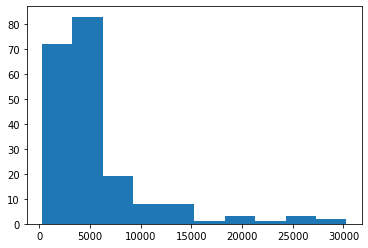

In [53]:
review_lens = [len(r) for r in reviews]
plt.hist(review_lens)

In [57]:
# but we need words
all_data = [doc_to_tokens(doc, dct_w2i=w2i) for doc in reviews]
tokens_to_doc(all_data[10][:10], i2w)

'Ei bine, nu stiu sa raspund la intrebarea asta… E'

In [58]:
reviews[10][:100]

' \n Ei bine, nu stiu sa raspund la intrebarea asta… \n E greu de crezut ca sunt atat de multe restaura'

(array([12., 52., 68., 24., 10., 10.,  4.,  2.,  3.,  5.,  1.,  0.,  1.,
         2.,  0.,  2.,  2.,  0.,  0.,  2.]),
 array([  34. ,  290.5,  547. ,  803.5, 1060. , 1316.5, 1573. , 1829.5,
        2086. , 2342.5, 2599. , 2855.5, 3112. , 3368.5, 3625. , 3881.5,
        4138. , 4394.5, 4651. , 4907.5, 5164. ]),
 <a list of 20 Patch objects>)

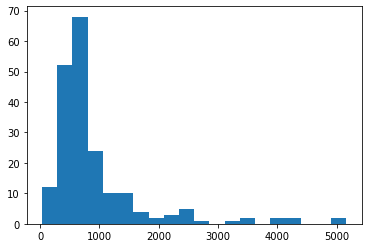

In [60]:
reviews_token_lens = [len(r) for r in all_data]
plt.hist(reviews_token_lens, bins=20)

In [61]:
all_data_fix = [r[:500] for r in all_data]
len(all_data_fix[123])

500

In [62]:
len(reviews[123].split())

838

In [66]:
def token_to_vect(tok, dct_w2i):
    sizev = len(dct_w2i)
    v = np.zeros(sizev)
    v[tok] = 1
    return v

test = [token_to_vect(t, w2i) for t in doc_to_tokens('ana are foarte multe mere frumusele si putin viermanoase', w2i)]
test[0].shape

(22000,)

In [68]:
len(w2i)

22000

In [69]:
test[0][:30]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [70]:
test[6][:10]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])

In [73]:
def vects_to_doc(vects, dct_i2w):
    tokens = []
    for v in vects:
        tokens.append(v.argmax())
    return tokens_to_doc(tokens, dct_i2w)

In [74]:
vects_to_doc(test, i2w)

'UNK are foarte multe mere UNK si putin UNK'

### Next steps:
 1. Generate X as either 3D or 2D tensor (each observation as a series of word one-hot encodings or a vector of word occurences)
 2. Prepare y !
 3. Split data
 4. Re-run sanity checks
 5. Create linear regression model
 6. Test linear model
 7. Next to representation learning